In [424]:
import pandas as pd
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt

ModuleNotFoundError: No module named 'seabron'

In [2]:
char=['midnight', 'one', 'two','three', 'four', 'five', 'six', 'seven',
       'eight', 'nine', 'ten', 'eleven', 'twelve', 'thirteen',
       'fourteen', 'fifteen',
       'sixteen', 'seventeen', 'eighteen',
       'nineteen', 'twenty', 'twenty_one',
       'twenty_two', 'twenty_three']

In [432]:
df=pd.read_csv('Data/Data.csv',encoding='CP949')

In [433]:
df

,use_mon,bus_route_no,stnd_bsst_id,bus_sta_nm,midnight_ride_num,midnight_alight_num,one_ride_num,one_alight_num,two_ride_num,two_alight_num,...,fifteen,sixteen,seventeen,eighteen,nineteen,twenty,twenty_one,twenty_two,twenty_three,total
0,201701,100,110000324,하계미성아파트.을지병원,319,402,28,62,1,1,...,1047,1104,1110,1268,1570,1223,1186,1173,913,18898
1,201701,100,110000328,한성여객종점,16,94,5,8,0,1,...,111,122,126,144,149,127,122,117,123,2143
2,201701,100,110000334,세이브존스포츠센터,12,319,1,50,0,1,...,461,517,545,619,728,572,578,613,481,9114
3,201701,100,110000336,노원경찰서.혜성여고,5,319,2,51,0,2,...,382,482,475,495,720,609,584,622,529,8080
4,201701,100,110000276,상명초등학교,7,48,2,29,0,0,...,87,80,78,92,105,60,93,73,103,1579
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1642782,202008,672,999800002,김포교통(종점가상),0,0,0,0,0,0,...,0,0,0,0,2,0,0,1,0,6
1642783,202008,9404,999800003,구미동차고지(기점가상),0,5,0,2,0,0,...,4,2,4,5,2,10,3,5,1,118
1642784,202008,9404,999800004,구미동차고지(종점가상),0,12,0,3,0,0,...,1,5,2,1,2,1,2,3,9,69
1642785,202008,9701,999800005,가좌동종점(종점가상),0,6,0,2,0,1,...,1,2,3,1,1,1,0,1,0,48


In [42]:
def convertIntColumns(df) :
    for i in range(0,24) :
        ch=char[i]
        path=ch+'_ride_num'
        path2=ch+'_alight_num'
        
        df=df.astype({
            ch : int,
            path : int,
            path2 : int
        })
    return df

In [ ]:
test=df[['bus_sta_nm','bus_route_no']].groupby(by=['bus_sta_nm'], as_index=False).count()

In [97]:
#달별로 분할
dataMonthlist=[]
for i in range(2017,2021):
    if(i==2020) :
        for j in range(1,9):
            dataMonthlist.append(df[df['use_mon'].isin([str(i)+str(0)+str(j)])])
    else :
        for j in range(1,10):
            dataMonthlist.append(df[df['use_mon'].isin([str(i)+str(0)+str(j)])])
        for j in range(10,13):
            dataMonthlist.append(df[df['use_mon'].isin([str(i)+str(j)])])
dataMonthlist=np.asarray(dataMonthlist)

C:\Users\SoobinYim\anaconda3\envs\env\lib\site-packages\numpy\core\_asarray.py:83: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  return array(a, dtype, copy=False, order=order)


In [275]:
#정류장의 버스 종류별 승하차 인원수 -> 버스 수 구하기
showCount=[]
for i in dataMonthlist :
    showCount.append(i[['bus_sta_nm','bus_route_no','total']].groupby(by=['bus_sta_nm','bus_route_no'], as_index=False).sum())
showCount=np.asarray(showCount)

C:\Users\SoobinYim\anaconda3\envs\env\lib\site-packages\numpy\core\_asarray.py:83: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  return array(a, dtype, copy=False, order=order)


In [277]:
showCount_1=[]
for i in showCount :
    tmp=i[['bus_sta_nm','bus_route_no']].groupby(by=['bus_sta_nm'], as_index=False).count()
    tmp.columns=['정류장','busKinds']
    tmp.set_index(tmp['정류장'],inplace=True)
    
    
    tmp.columns=['busStop','버스 종류']
    tmp=tmp.drop('busStop',1)
    tmp=tmp.sort_values(by=['버스 종류'], axis=0, ascending=False)
    showCount_1.append(tmp)
showCount_1=np.asarray(showCount_1)

In [278]:
showCount_1[40]

,버스 종류
정류장,
서울역버스환승센터,51
숭례문,44
현대아파트,43
우성아파트,31
미아사거리역,27
...,...
영신고등학교,1
영신약국,1
영신여객차고지(우이동종점),1


In [279]:
#정류장별 bus 수 count -> .count 사용
showBusCount=[]

for i in dataMonthlist :  
    tmp=i[['bus_sta_nm','bus_route_no']].groupby(by=['bus_sta_nm'], as_index=False).count()
    tmp.columns=['정류장','busCount']
    tmp.set_index(tmp['정류장'],inplace=True)
    
    tmp.columns=['busStop','버스 수']
    tmp=tmp.drop('busStop',1)
    tmp=tmp.sort_values(by=['버스 수'], axis=0, ascending=False)
    showBusCount.append(tmp)
showBusCount = np.asarray(showBusCount)

C:\Users\SoobinYim\anaconda3\envs\env\lib\site-packages\numpy\core\_asarray.py:83: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  return array(a, dtype, copy=False, order=order)


In [280]:
showBusCount[1]

,버스 수
정류장,
서울역버스환승센터,68
현대아파트,62
미아사거리역,60
종로2가,58
우성아파트,56
...,...
성동보건분소앞,1
성동보건소,1
성락교회크리스천선교센터,1


In [281]:
#정류장 별 유동인구 수 count -> total에 sum사용
showPersonCount=[]
for i in dataMonthlist :    
    tmp=i[['bus_sta_nm','total']].groupby(by=['bus_sta_nm'], as_index=False).sum()
    tmp.columns=['정류장','personCount']
    
    tmp.set_index(tmp['정류장'],inplace=True)
    tmp=tmp.sort_values(by=['personCount'], axis=0, ascending=False)
    
    tmp.columns=['busStop','이용자 수']
    tmp=tmp.drop('busStop',1)
    tmp=tmp.sort_values(by=['이용자 수'], axis=0, ascending=False)
    showPersonCount.append(tmp)
showPersonCount=np.asarray(showPersonCount)

C:\Users\SoobinYim\anaconda3\envs\env\lib\site-packages\numpy\core\_asarray.py:83: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  return array(a, dtype, copy=False, order=order)


<function matplotlib.pyplot.show(*args, **kw)>

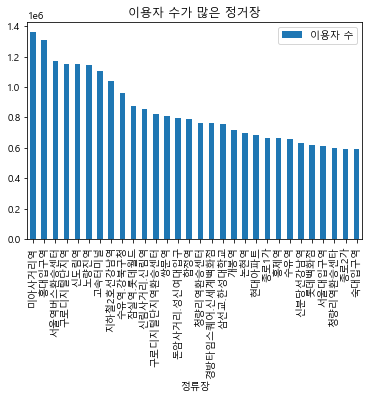

In [361]:
test=showPersonCount[10]
test=test.iloc[0:30]
test.plot(kind='bar', title="이용자 수가 많은 정거장")
plt.xticks(rotation=90)
plt.show

In [372]:
from sklearn.preprocessing import MinMaxScaler
scaler=MinMaxScaler()

In [409]:
mergedData=[]
for i in range(0,len(showCount_1)):
    df_left=showCount_1[i]
    df_right=showPersonCount[i]
    df_left[:]=scaler.fit_transform(df_left[:])
    df_right[:]=scaler.fit_transform(df_right[:])
    mergeData=pd.merge(df_left,df_right,left_index=True,right_index=True,how='right')
    mergedData.append(mergeData)
mergedData=np.asarray(mergedData)

C:\Users\SoobinYim\anaconda3\envs\env\lib\site-packages\numpy\core\_asarray.py:83: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  return array(a, dtype, copy=False, order=order)


In [394]:
for i in range(0,len(mergedData)):
    test=mergedData[i]
    mergedData[i]=test.iloc[0:100]

<function matplotlib.pyplot.show(*args, **kw)>

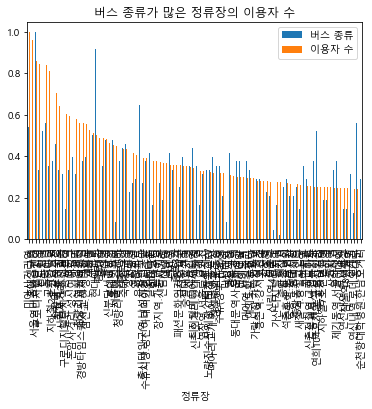

In [395]:
mergedData[10].plot(kind='bar', title="버스 종류가 많은 정류장의 이용자 수")
plt.xticks(rotation=90)
plt.show

In [410]:
mergedData2=[]
for i in range(0,len(showCount_1)):
    df_left=showBusCount[i]
    df_right=showPersonCount[i]
    df_left[:]=scaler.fit_transform(df_left[:])
    df_right[:]=scaler.fit_transform(df_right[:])
    mergeData=pd.merge(df_left,df_right,left_index=True,right_index=True,how='right')
    mergedData2.append(mergeData)
mergedData2=np.asarray(mergedData2)

C:\Users\SoobinYim\anaconda3\envs\env\lib\site-packages\numpy\core\_asarray.py:83: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  return array(a, dtype, copy=False, order=order)


In [407]:
for i in range(0,len(mergedData2)):
    test=mergedData2[i]
    
    mergedData2[i]=test.iloc[0:200]

<function matplotlib.pyplot.show(*args, **kw)>

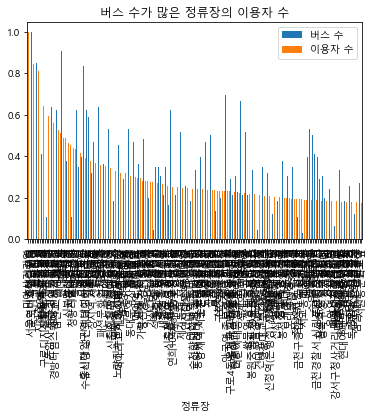

In [408]:
mergedData2[10].plot(kind='bar', title="버스 수가 많은 정류장의 이용자 수")
plt.xticks(rotation=90)
plt.show

In [ ]:
mergedData3=[]
for i in range(0,len(showCount_1)):
    df_left=mergedData[i]
    df_right=showBusCount[i]
    df_left[:]=scaler.fit_transform(df_left[:])
    df_right[:]=scaler.fit_transform(df_right[:])
    mergeData=pd.merge(df_left,df_right,left_index=True,right_index=True,how='left')
    
    mergedData3.append(mergeData)
mergedData3=np.asarray(mergedData3)

In [ ]:
for i in range(0,len(mergedData3)):
    test=mergedData3[i]
    mergedData3[i]=test.iloc[0:50]

In [ ]:
mergedData3[20].plot(kind='bar', title="버스 수가 많은 정류장의 이용자 수")
plt.xticks(rotation=90)
plt.show

In [ ]:
yearKindsData=[]
for i in range(2017,2020,1) :
    yearKindsData.append(pd.concat(showCount_1[(i-2017)*12:(i-2017)*12+12],axis=0,ignore_index=True))
yearKindsData.append(pd.concat(showCount_1[(2020-2017)*12:len(showCount_1)],axis=0,ignore_index=True))
yearKindsData=np.asarray(yearKindsData)

In [ ]:
yearCountData=[]
for i in range(2017,2020,1) :
    yearCountData.append(pd.concat(showBusCount[(i-2017)*12:(i-2017)*12+12],axis=0,ignore_index=True))
yearCountData.append(pd.concat(showBusCount[(2020-2017)*12:len(showBusCount)],axis=0,ignore_index=True))
yearCountData=np.asarray(yearCountData)

In [178]:
yearPersonData=[]
for i in range(2017,2020,1) :
    yearPersonData.append(pd.concat(showPersonCount[(i-2017)*12:(i-2017)*12+12],axis=0,ignore_index=True))
yearPersonData.append(pd.concat(showPersonCount[(2020-2017)*12:len(showPersonCount)],axis=0,ignore_index=True))
yearPersonData=np.asarray(yearPersonData)

C:\Users\SoobinYim\anaconda3\envs\env\lib\site-packages\numpy\core\_asarray.py:83: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  return array(a, dtype, copy=False, order=order)


In [180]:
yearPersonData[3]

,date,busStopId,personCount
0,202001,홍대입구역,1206960
1,202001,미아사거리역,1193633
2,202001,고속터미널,1045785
3,202001,구로디지털단지역,1038583
4,202001,신도림역,1018484
...,...,...,...
52469,202008,중앙잔디광장,2
52470,202008,한강대교(가상),1
52471,202008,성산대교(가상),1
52472,202008,한남대교남단(가상),1


In [223]:
test=showCount_1[0]
test.head()

,date,busStopId,busKinds
busStopId,,,
서울역버스환승센터,201701,서울역버스환승센터,51
현대아파트,201701,현대아파트,46
숭례문,201701,숭례문,41
우성아파트,201701,우성아파트,32
종로1가,201701,종로1가,29


In [ ]:
'''
for i in showCount_1 :
    tmp=i[['use_mon','bus_sta_nm','bus_route_no']].groupby(by=['use_mon','bus_sta_nm'], as_index=False).count()
    tmp.columns=['date','busStopId','busKinds']
    tmp=tmp.sort_values(by=['busKinds'], axis=0, ascending=False)
    tem=tmp.astype({'date' : str})
    showCount_1.append(tmp)
showCount_1=np.asarray(showCount_1)
'''

In [148]:
#save data
csv_1 = pd.concat(showCount_1,axis=0,ignore_index=True)
csv_1.to_csv('Data/BusKindsData.csv',encoding='euc-kr', index=False)
csv_2 = pd.concat(showBusCount,axis=0,ignore_index=True)
csv_2.to_csv('Data/BusCountData.csv',encoding='euc-kr', index=False)
csv_3 = pd.concat(showPersonCount,axis=0,ignore_index=True)
csv_3.to_csv('Data/PersonCountData.csv',encoding='euc-kr', index=False)